In [1]:
%pylab inline
import os
import sys

module_path = os.path.abspath(os.path.join('./src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import weights
import tracers_properties
from pygadgetreader import *
import soda

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [2]:
pp= readsnap('./halos/LMC6_6.25M_vir_000', 'pos', 'dm')
vv= readsnap('./halos/LMC6_6.25M_vir_000', 'vel', 'dm')

massarr= readsnap('./halos/LMC6_6.25M_vir_000', 'mass', 'dm')
Epp = readsnap('./halos/LMC6_6.25M_vir_000', 'pot', 'dm')
ids = readsnap('./halos/LMC6_6.25M_vir_000', 'pid', 'dm')
rr=np.sqrt(pp[:,0]**2+pp[:,1]**2+pp[:,2]**2)


r_cut = index = np.where((rr<40))[0]

pp = pp[r_cut]
rr = rr[r_cut]
vv = vv[r_cut]

massarr = massarr[r_cut]
Epp = Epp[r_cut]
ids = ids[r_cut]

Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs


In [3]:
len(ids)

2351198

In [4]:
partmass=massarr[3]*1e10 #generated the halo particles as "bulge"-type in Gadget file
a=0.5
v2=vv[:,0]**2+vv[:,1]**2+vv[:,2]**2
Ekk=0.5*v2



In [5]:
r_profiles = np.linspace(1, 50, 100)
#r_profiles2 = np.linspace(1, 50, 1000)

teo_plummer = soda.profiles.dens_plummer(5, r_profiles, 1E10)

50


/home/ngaravito/work/github/tracers_triaxial/src/weights.py:167: RuntimeWarning: divide by zero encountered in true_divide
  Weights=distribution_function[indsort[::-1]]/((Histo_M)/density_of_states)


100
1000
2000


NameError: name 'r_profiles2' is not defined

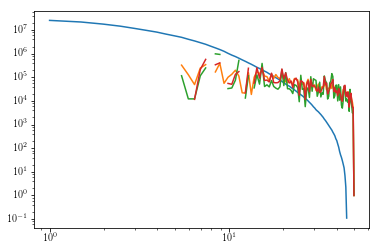

In [6]:
bins = [50, 100, 1000, 2000]
for i in bins:
    print(i)
    weights_plum, w_ids = weights.weight_triaxial(rr, Ekk, Epp, ids, partmass,0.01, 
                                                  i, 1E10, 'Plummer', [5])
    density_plum = tracers_properties.den_tracers(weights_plum, ids, w_ids, rr, massarr, 100)
    
    loglog(r_profiles, density_plum)
loglog(r_profiles, teo_plummer, c='k')

In [7]:
#weights_plum, w_ids = weights.weight_triaxial(rr, Ekk, Epp, ids, partmass,0.01, 100, 1E10, 'Plummer', [5])


In [ ]:
weights_plum_lr, w_ids_lr = weights.weight_triaxial(rr, Ekk, Epp, ids, partmass, 0.01, 
                                                    2000, 1E10, 'Plummer', [5])
density_plum_lr = tracers_properties.den_tracers(weights_plum_lr, ids, w_ids_lr, rr, massarr, 1000)


In [ ]:
print(weights_plum)

In [ ]:
print(weights_plum_lr)

In [ ]:
loglog(r_profiles[:-1], density_plum[:-1])
loglog(r_profiles, density_plum_lr)
loglog(r_profiles, teo_plummer, label='Teo')

legend()

In [ ]:
weights_hern, w_ids = weights.weight_triaxial(rr,Ekk,Epp,ids,partmass,0.01, 50, 1E10, 'Hernquist', [5])
density_hern = tracers_properties.den_tracers(weights_hern, ids, w_ids, rr, massarr, 1000)

In [ ]:
teo_hern = soda.profiles.dens_hernquist(5, r_profiles,0, 0, 1E10)

In [ ]:
soda.profiles.dens_hernquist?

In [ ]:
loglog(r_profiles, density_hern)
loglog(r_profiles, teo_hern)

In [ ]:
loglog(r_profiles, density_plum)
loglog(r_profiles, density_hern)
